In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../desktop/bodyPerformance.csv')

In [4]:
print(df.head())

   age gender  height  weight  body fat_%  diastolic  systolic  gripForce  \
0   27      M   172.3   75.24        21.3       80.0     130.0       54.9   
1   25      M   165.0   55.80        15.7       77.0     126.0       36.4   
2   31      M   179.6   78.00        20.1       92.0     152.0       44.8   
3   32      M   174.5   71.10        18.4       76.0     147.0       41.4   
4   28      M   173.8   67.70        17.1       70.0     127.0       43.5   

   sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0                     18.4            60.0          217.0     C  
1                     16.3            53.0          229.0     A  
2                     12.0            49.0          181.0     C  
3                     15.2            53.0          219.0     B  
4                     27.1            45.0          217.0     B  


In [5]:
df.groupby(['age','gender'])[['height','weight','body fat_%']].mean()

height     weight  body fat_%
age gender                                   
21  F       162.477586  56.690394   27.834101
    M       174.725627  72.459892   18.513941
22  F       162.387462  55.965505   27.175086
    M       174.642857  73.021472   18.357357
23  F       162.686170  56.774752   27.259763
...                ...        ...         ...
62  M       169.248980  68.748571   22.475533
63  F       155.544578  56.311807   31.302410
    M       167.763946  68.191565   23.420680
64  F       155.346000  56.561600   32.737535
    M       168.200000  69.285217   22.854783

[88 rows x 3 columns]

In [6]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='age'>

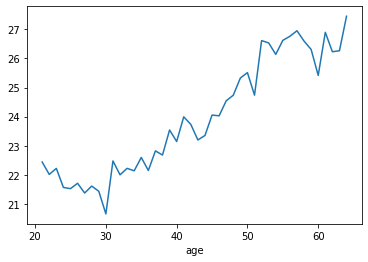

In [7]:
AS = df.groupby(['age'])['body fat_%'].mean()
AS.plot()

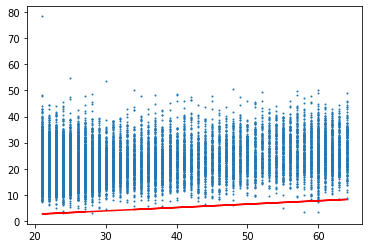

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression

test_df = pd.read_csv('../desktop/bodyPerformance.csv')

X = np.array(df['age']).reshape(-1,1)
y = df['body fat_%']
lr = LinearRegression()
lr.fit(X, y)

w = lr.coef_[0]

plt.scatter(X, y, s=1)
plt.plot(X, w*X, c='red')

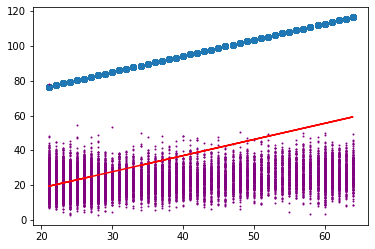

In [35]:
test_X = np.array(test_df['age']).reshape(-1,1)
pred_y = lr.predict(test_X)

plt.scatter(test_X, pred_y)
plt.plot(test_X, w*test_X, c='red')

test_y = test_df['body fat_%']

plt.scatter(test_X, test_y, c='purple', s=1)

4800.659642422146 117.4658071838331


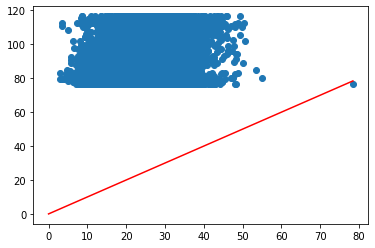

-90.16702032437618


In [36]:
from sklearn.metrics import mean_squared_error
test_loss = mean_squared_error(test_y, pred_y)

train_y = lr.predict(X)
train_loss = mean_squared_error(y, train_y)

print(test_loss, train_loss)
plt.scatter(test_y, pred_y)
plt.plot([0,np.max(test_y)],[0,np.max(test_y)], color='red')
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(test_y, pred_y)
print(r2)